In [1]:
import rejector
from rejector.prediction import Prediction
from rejector.costs import Costs
from rejector.metric import Metric
from rejector.pdfs import PDFs
import numpy as np
from typing import List
from matplotlib import pyplot
from tqdm import tqdm

C:\Users\phili\anaconda3\envs\rejector\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


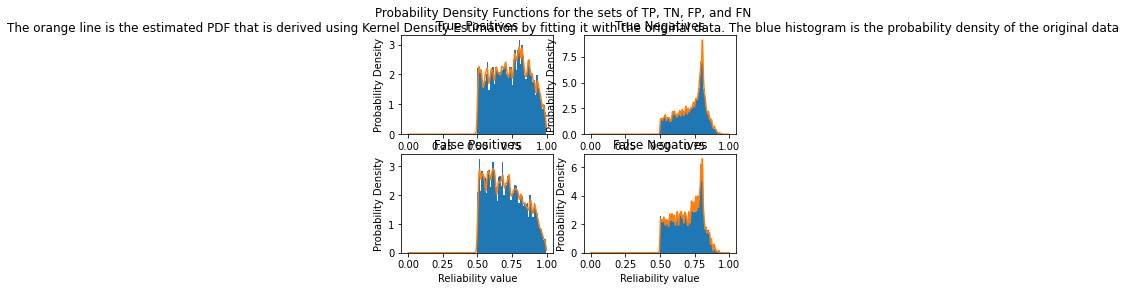

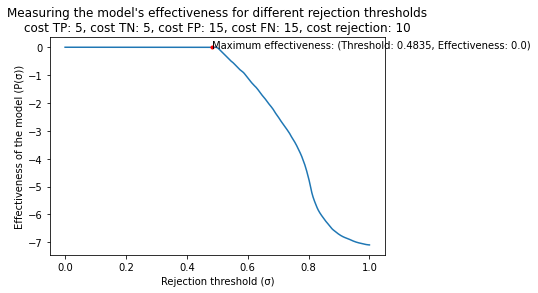

In [2]:
# The experiments below test the non-calibrated CNN 10 epochs model trained on the Hoseem dataset and now tested on SemEval dataset.
# Model file name: cnn-10-epochs-hoseem-2-classes-logits
predictions = Prediction.load("input/cnn-sem-eval-calibrated.p", "Hate")
COST_TP = 5
COST_TN = 5
COST_FP = 15
COST_FN = 15
COST_REJECTION = 10
costs = Costs(COST_TP, COST_TN, COST_FP, COST_FN, COST_REJECTION)
# Run line below to find bandwidth values
# metric = Metric(costs, predictions)
bandwidths = {'TPS': {'bandwidth': 0.0049023},
              "TNS": {'bandwidth': 0.00282276}, 
              "FPS": {'bandwidth': 0.00567483}, 
              "FNS": {'bandwidth': 0.00264395}}
metric = Metric(costs, predictions, bandwidths)
metric.plot_pdfs()
metric.plot_effectiveness()

  0%|                                                                                           | 0/25 [00:00<?, ?it/s]

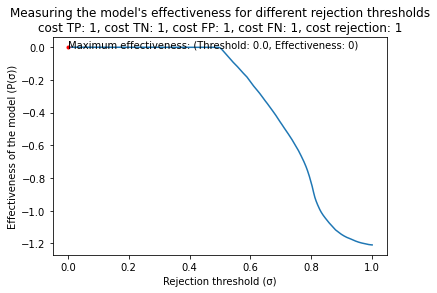

  4%|███▎                                                                               | 1/25 [00:19<07:58, 19.93s/it]

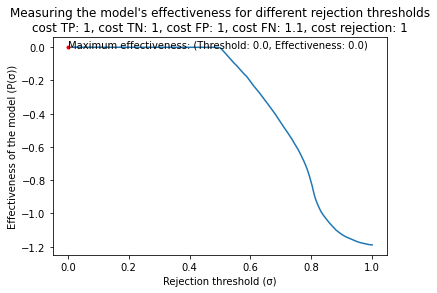

  8%|██████▋                                                                            | 2/25 [00:39<07:36, 19.85s/it]

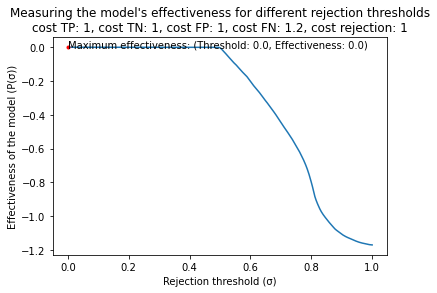

 12%|█████████▉                                                                         | 3/25 [00:59<07:15, 19.78s/it]

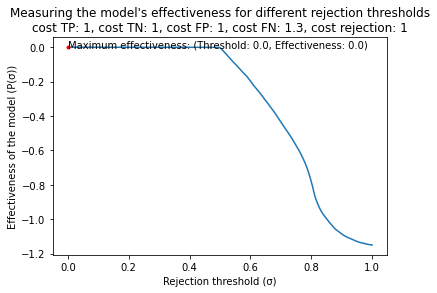

 16%|█████████████▎                                                                     | 4/25 [01:19<06:56, 19.82s/it]

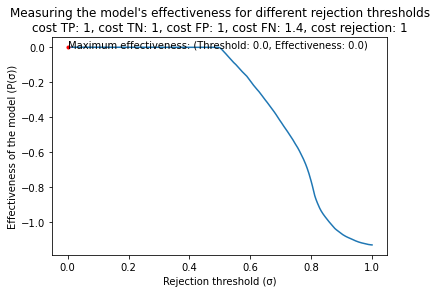

 20%|████████████████▌                                                                  | 5/25 [01:38<06:34, 19.72s/it]

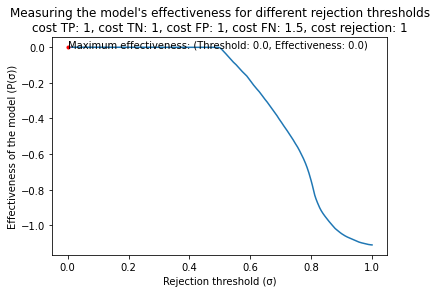

 24%|███████████████████▉                                                               | 6/25 [01:58<06:14, 19.71s/it]

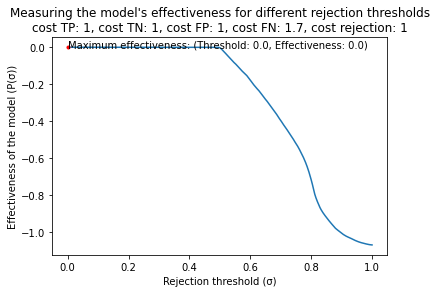

 28%|███████████████████████▏                                                           | 7/25 [02:18<05:55, 19.74s/it]

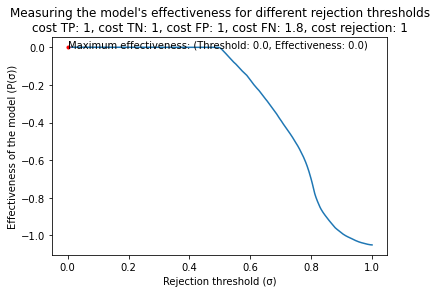

 32%|██████████████████████████▌                                                        | 8/25 [02:38<05:35, 19.74s/it]

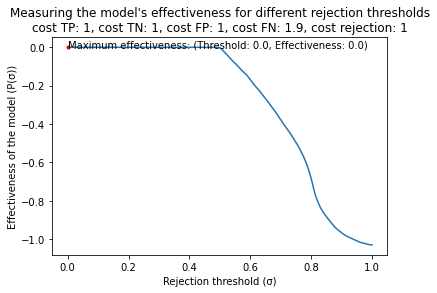

 36%|█████████████████████████████▉                                                     | 9/25 [02:57<05:16, 19.76s/it]

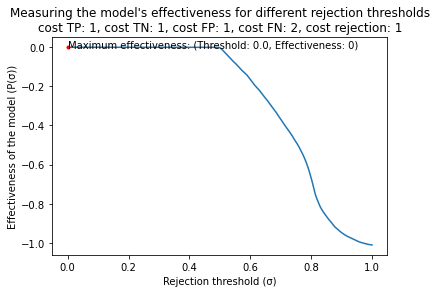

 40%|████████████████████████████████▊                                                 | 10/25 [03:18<05:02, 20.18s/it]

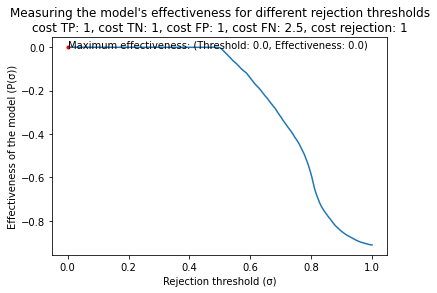

 44%|████████████████████████████████████                                              | 11/25 [03:41<04:50, 20.76s/it]

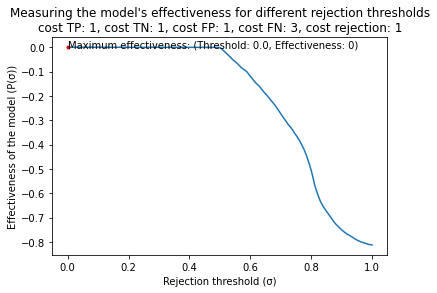

 48%|███████████████████████████████████████▎                                          | 12/25 [04:00<04:26, 20.49s/it]

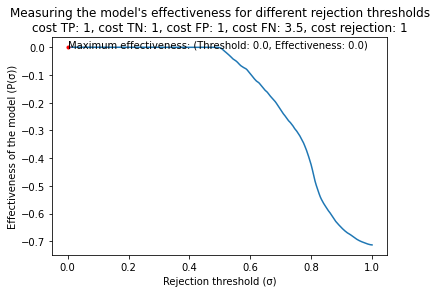

 52%|██████████████████████████████████████████▋                                       | 13/25 [04:20<04:02, 20.24s/it]

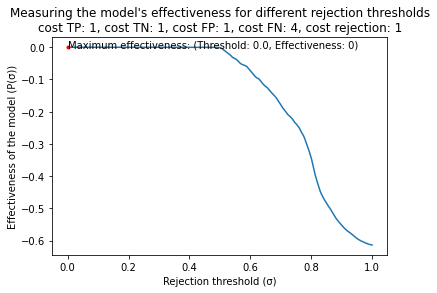

 56%|█████████████████████████████████████████████▉                                    | 14/25 [04:40<03:40, 20.08s/it]

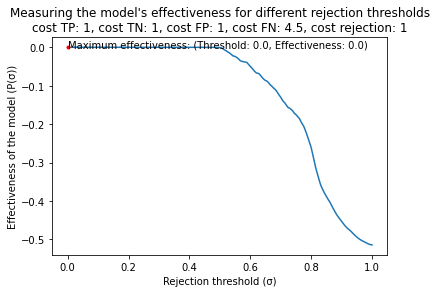

 60%|█████████████████████████████████████████████████▏                                | 15/25 [05:00<03:20, 20.04s/it]

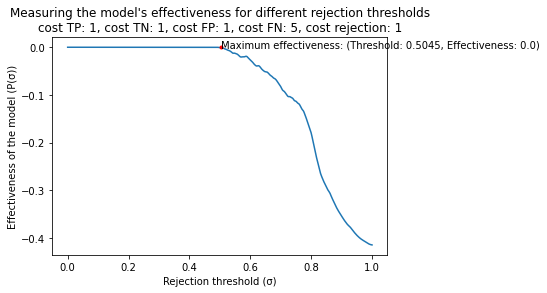

 64%|████████████████████████████████████████████████████▍                             | 16/25 [05:20<03:00, 20.05s/it]

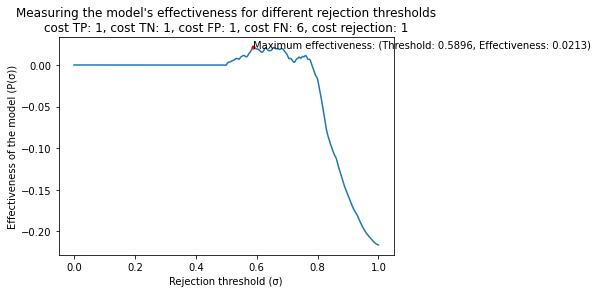

 68%|███████████████████████████████████████████████████████▊                          | 17/25 [05:42<02:45, 20.68s/it]

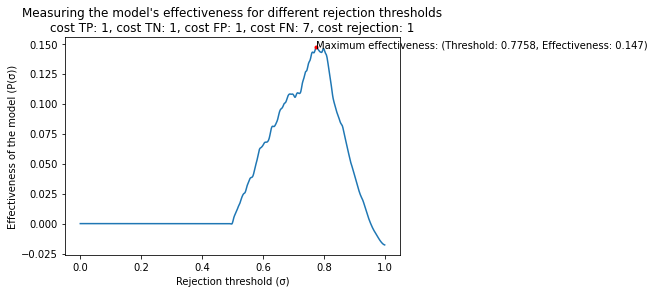

 72%|███████████████████████████████████████████████████████████                       | 18/25 [06:12<02:43, 23.35s/it]

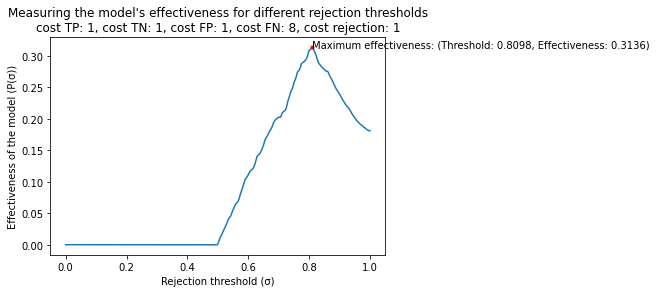

 76%|██████████████████████████████████████████████████████████████▎                   | 19/25 [06:34<02:18, 23.14s/it]

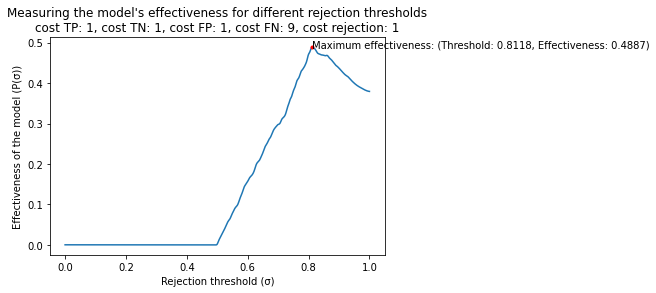

 80%|█████████████████████████████████████████████████████████████████▌                | 20/25 [06:59<01:58, 23.76s/it]

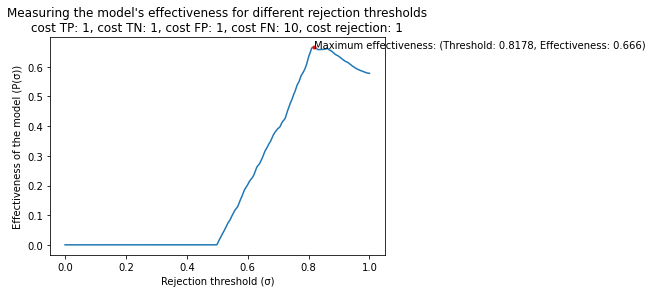

 84%|████████████████████████████████████████████████████████████████████▉             | 21/25 [07:25<01:37, 24.41s/it]

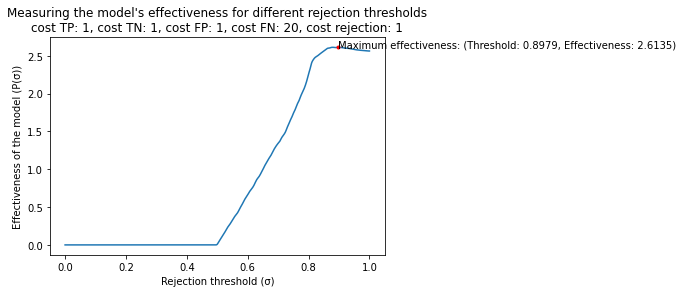

 88%|████████████████████████████████████████████████████████████████████████▏         | 22/25 [07:49<01:12, 24.21s/it]

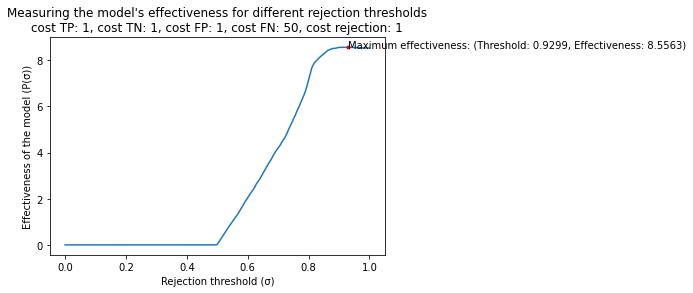

 92%|███████████████████████████████████████████████████████████████████████████▍      | 23/25 [08:14<00:49, 24.56s/it]

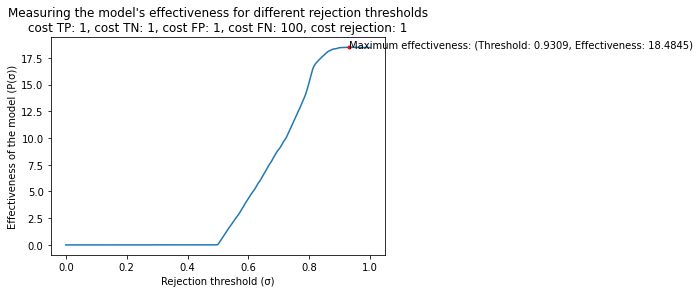

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 24/25 [08:38<00:24, 24.35s/it]

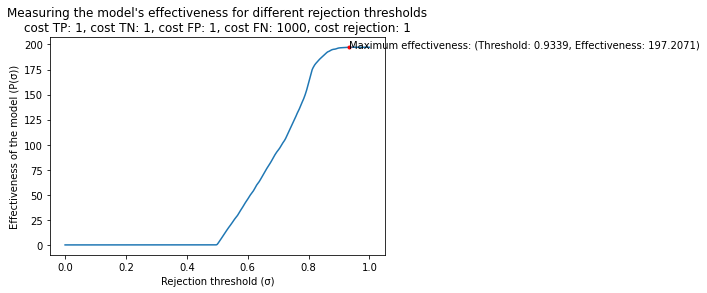

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [09:02<00:00, 21.71s/it]


In [3]:
%matplotlib inline
"""
In this experiment, different FP/FN ratio's are tested for the Hoseem dataset.
"""
cost_setups = [{'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1, 'cost_FN': 1, 'cost_rejection': 1},
               {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 1.1, 'cost_rejection': 1},
                {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 1.2, 'cost_rejection': 1},
                {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 1.3, 'cost_rejection': 1},
                {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 1.4, 'cost_rejection': 1},
              {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 1.5, 'cost_rejection': 1},
              {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 1.7, 'cost_rejection': 1},
              {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 1.8, 'cost_rejection': 1},
              {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 1.9, 'cost_rejection': 1},
               {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 2, 'cost_rejection': 1},
               {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 2.5, 'cost_rejection': 1},
               {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 3, 'cost_rejection': 1},
                {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 3.5, 'cost_rejection': 1},
               {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 4, 'cost_rejection': 1},
              {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 4.5, 'cost_rejection': 1},
               {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 5, 'cost_rejection': 1},
               {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                'cost_FN': 6, 'cost_rejection': 1},
               {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                'cost_FN': 7, 'cost_rejection': 1},
               {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                'cost_FN': 8, 'cost_rejection': 1},
               {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 9, 'cost_rejection': 1},
               {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 10, 'cost_rejection': 1},
               {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 20, 'cost_rejection': 1},
               {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 50, 'cost_rejection': 1},
               {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                   'cost_FN': 100, 'cost_rejection': 1},
               {'cost_TP': 1, 'cost_TN': 1, 'cost_FP': 1,
                'cost_FN': 1000, 'cost_rejection': 1}]
x_values = []
y1_values = []
y2_values = []
for setup in tqdm(cost_setups):
    costs = Costs(setup['cost_TP'], setup['cost_TN'],
                  setup['cost_FP'], setup['cost_FN'], setup['cost_rejection'])
    metric = Metric(costs, predictions, bandwidths)
    metric.plot_effectiveness()
    pdfs = PDFs(predictions, bandwidths)
    thresholds = np.linspace(0, 1, 1000)

    effectiveness_values = list(
        map(lambda t:  metric.calculate_effectiveness(t), thresholds))

    (index, max_effectiveness) = metric.maximum_effectiveness(
        effectiveness_values)
    x_values.append(setup['cost_FP']/setup['cost_FN'])
    y1_values.append(thresholds[index])
    y2_values.append(max_effectiveness)

[1.0, 0.9090909090909091, 0.8333333333333334, 0.7692307692307692, 0.7142857142857143, 0.6666666666666666, 0.5882352941176471, 0.5555555555555556, 0.5263157894736842, 0.5, 0.4, 0.3333333333333333, 0.2857142857142857, 0.25, 0.2222222222222222, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.05, 0.02, 0.01, 0.001]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5045045045045045, 0.5895895895895896, 0.7757757757757757, 0.8098098098098098, 0.8118118118118118, 0.8178178178178178, 0.8978978978978979, 0.92992992992993, 0.9309309309309309, 0.933933933933934]


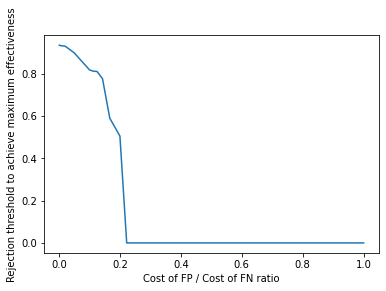

In [4]:
pyplot.plot(x_values, y1_values)
print(x_values)
print(y1_values)
pyplot.xlabel("Cost of FP / Cost of FN ratio")
pyplot.ylabel("Rejection threshold to achieve maximum effectiveness")
pyplot.show()

[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 4.482169433665112e-06, 0.021309731580802904, 0.14701703966395074, 0.31362266087467794, 0.48865255358696236, 0.6659778502495893, 2.6134794454646686, 8.556276240561143, 18.48448425765214, 197.20710616635532]


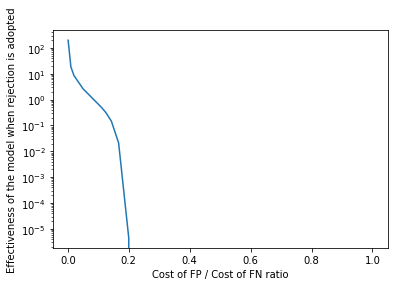

In [5]:
print(y2_values)
pyplot.plot(x_values, y2_values)
pyplot.xlabel("Cost of FP / Cost of FN ratio")
pyplot.ylabel("Effectiveness of the model when rejection is adopted")
pyplot.yscale("log")
pyplot.show()

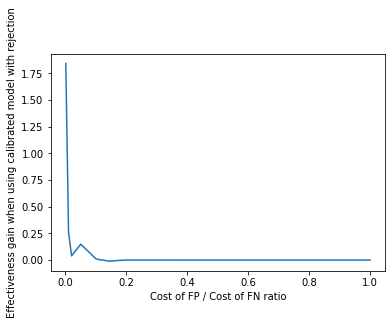

In [6]:
# Difference calibrated and non-calibrated model
x_values = [1.0, 0.9090909090909091, 0.8333333333333334, 0.7692307692307692, 0.7142857142857143, 0.6666666666666666, 0.5882352941176471, 0.5555555555555556, 0.5263157894736842, 0.5, 0.4, 0.3333333333333333, 0.2857142857142857, 0.25, 0.2222222222222222, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.05, 0.02, 0.01, 0.001]
y2_calibrated = [0, 1.2587095225920915e-05, 3.312118193776392e-05, 5.839640609227846e-05, 8.768422979137708e-05, 0.00012054490797368715, 0.00019420296524712315, 0.00023586430611668017, 0.0002784974249869306, 0.00032515930109955566, 0.0005857987789437298, 0.0008948904361355496, 0.0012464313190093976, 0.001644105978882801, 0.002082400252036844, 0.002562021349877312, 0.0036506186043737225, 0.004928246917422744, 0.0252673602141789, 0.04834243510932071, 0.0869786926556742, 0.5917151570922878, 2.35454242946184, 6.050758869726104, 73.64328787973307]
y2_not_calibrated = [0, 2.0603156163663187e-05, 4.6368504249686664e-05, 7.491368635620561e-05, 0.0001051210503982711, 0.00013767276937518867, 0.00020590409896138154, 0.00024327732559963818, 0.0002816694970440827, 0.0003200616684885273, 0.0005306387179073343, 0.0007685835956432449, 0.0010343894666642298, 0.0013349682378530788, 0.0016777263880924304, 0.0021918696703010793, 0.00856675920860488, 0.015302633626102506, 0.025644423206057494, 0.045390226957713886, 0.07451518895424673, 0.44255040731444795, 2.3149295672849224, 5.788017435336217, 71.80013996737956]
diff_y2 = np.subtract(y2_calibrated, y2_not_calibrated)
pyplot.plot(x_values, diff_y2)
pyplot.xlabel("Cost of FP / Cost of FN ratio")
pyplot.ylabel("Effectiveness gain when using calibrated model with rejection")
pyplot.show()

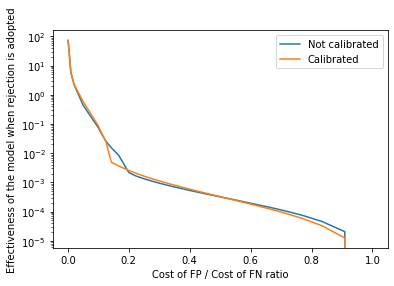

In [7]:
# Plot both the calibrated and non-calibrated lines for comparison
pyplot.plot(x_values, y2_not_calibrated, label="Not calibrated")
pyplot.plot(x_values, y2_calibrated, label="Calibrated")
pyplot.xlabel("Cost of FP / Cost of FN ratio")
pyplot.ylabel("Effectiveness of the model when rejection is adopted")
pyplot.yscale("log")
pyplot.legend()
pyplot.show()

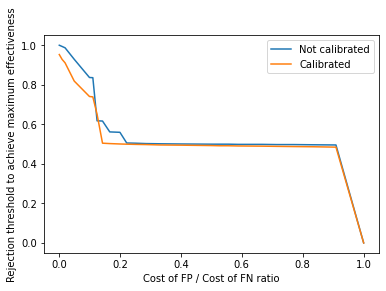

In [8]:
# Plot both the calibrated and non-calibrated lines for comparison
y1_not_calibrated = [0.0, 0.4954954954954955, 0.4964964964964965, 0.4974974974974975, 0.4974974974974975, 0.4984984984984985, 0.4984984984984985, 0.4994994994994995, 0.4994994994994995, 0.4994994994994995, 0.5005005005005005, 0.5015015015015015, 0.5025025025025025, 0.5045045045045045, 0.5055055055055055, 0.5595595595595596, 0.5615615615615616, 0.6166166166166166, 0.6176176176176176, 0.8358358358358359, 0.8368368368368369, 0.9289289289289289, 0.986986986986987, 0.993993993993994, 1.0]
y1_calibrated = [0.0, 0.4844844844844845, 0.48648648648648646, 0.4874874874874875, 0.48848848848848847, 0.4894894894894895, 0.4904904904904905, 0.49149149149149146, 0.49149149149149146, 0.4924924924924925, 0.4944944944944945, 0.4954954954954955, 0.4974974974974975, 0.4984984984984985, 0.4994994994994995, 0.5005005005005005, 0.5025025025025025, 0.5045045045045045, 0.6506506506506506, 0.7387387387387387, 0.7407407407407407, 0.8188188188188188, 0.9109109109109109, 0.9289289289289289, 0.9529529529529529]
pyplot.plot(x_values, y1_not_calibrated, label="Not calibrated")
pyplot.plot(x_values, y1_calibrated, label="Calibrated")
pyplot.xlabel("Cost of FP / Cost of FN ratio")
pyplot.ylabel("Rejection threshold to achieve maximum effectiveness")
pyplot.legend()
pyplot.show()